In [2]:
#| default_exp openai_image_inquiry

In [3]:
#| hide
from nbdev.showdoc import *

In [51]:
#| export
import json
import base64
import requests
from openai import OpenAI

In [50]:
from IPython.display import Image
import glob

In [52]:
files = glob.glob("*.jpg")
len(files), files[:3]

(276, ['frame_1728240209.jpg', 'frame_1728231053.jpg', 'frame_1728234908.jpg'])

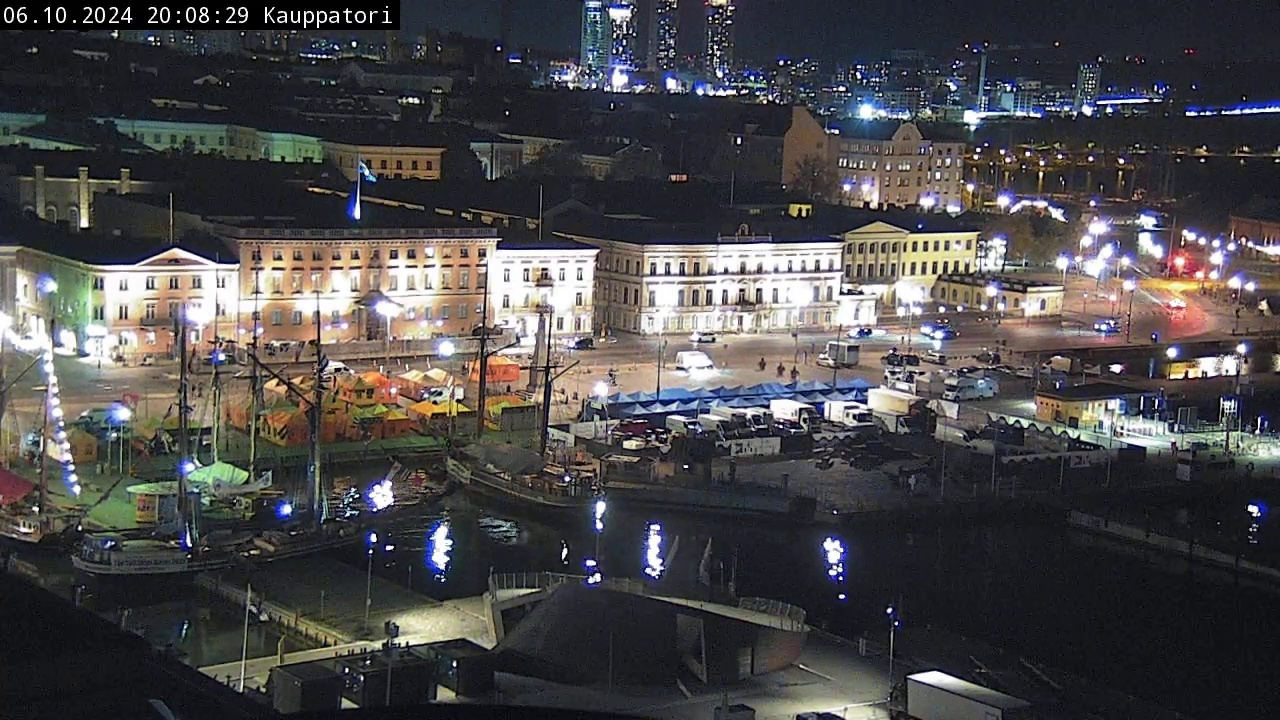

In [53]:
Image(files[2])

In [55]:
#| export
def encode_image(fname):
  with open(fname, "rb") as f:
    return base64.b64encode(f.read()).decode('utf-8')

In [56]:
base64_image = encode_image(files[0])
base64_image[:9]

'/9j/4AAQS'

In [ ]:
#| export
def info(response):
    txt = json.loads(response.json())['choices'][0]['message']['content']
    data = json.loads(txt.replace('```json\n', "").replace('\n```', ""))
    return data

In [113]:
#| export
class openai_inquiry:
    def __init__(self, apikey=api_key):
        self.client = OpenAI()

    def ask_text(self, question):
        completion = self.client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "user", "content": question}
            ]
        )
        return completion.choices[0].message.content

    def ask_image(self, fname):

        instruction = """
        Describe this image quantitatively as many as possible in json format.
        
        Here's the example:
        {'timestamp': '2024-10-06T19:04:14',
         'location': 'Kauppatori',
         'dimensions': {'width': 1280, 'height': 720},
         'buildings': {'number_of_buildings': 10,
          'building_height_range': '3-5 stories'},
         'vehicles': {'number_of_vehicles': 5, 'types': ['cars', 'trucks']},
         'waterbodies': {'visible': True, 'type': 'harbor', 'number_of_boats': 4},
         'street_lights': {'number_of_street_lights': 20},
         'people': {'approximate_number': 10},
         'lighting': {'time_of_day': 'evening', 'artificial_lighting': 'prominent'},
         'visibility': {'clear': True},
         'sky': {'visible': True, 'light_conditions': 'dusk'}}
        """
        
        response = self.client.chat.completions.create(
          model="gpt-4o",
          messages=[
            {
              "role": "user",
              "content": [
                {
                  "type": "text",
                  "text": instruction,
                },
                {
                  "type": "image_url",
                  "image_url": {
                    "url": f"data:image/jpeg;base64,{encode_image(fname)}",
                    "detail": "high",
                  },
                },
                # {
                #   "type": "image_url",
                #   "image_url": {
                #     "url": f"data:image/jpeg;base64,{encode_image(files[1])}"
                #   },
                # },
              ],
            }
          ],
          max_tokens=300,
        )
        return info(response)

In [114]:
client = openai_inquiry()
ans = client.ask_text("The capital of France?")
print(ans)
assert "Paris" in ans

The capital of France is Paris.


In [117]:
ans = client.ask_image(files[3])
ans
#FIXME: assert here!

{'timestamp': '2024-10-07T12:53:39',
 'location': 'Eteläsatama',
 'dimensions': {'width': 1280, 'height': 720},
 'buildings': {'number_of_buildings': 8,
  'building_height_range': '2-4 stories'},
 'vehicles': {'number_of_vehicles': 5, 'types': ['cars']},
 'waterbodies': {'visible': True, 'type': 'harbor', 'number_of_boats': 6},
 'street_lights': {'number_of_street_lights': 0},
 'people': {'approximate_number': 0},
 'lighting': {'time_of_day': 'daytime', 'artificial_lighting': 'none'},
 'visibility': {'clear': True},
 'sky': {'visible': True, 'light_conditions': 'cloudy'}}

In [4]:
#| hide
import nbdev; nbdev.nbdev_export()